# Unpacking Camera Trap Data

This notebook uses the `scikit-image` library to read photos taken from a camera trap for subsequent processing and analysis. In particular, we're interested in using the data in the red, green, and blue bands of the JPEG image to potentially identify periods of interest (and their characteristics, if possible) that might correspond to sediment flushes, no-flow, and/or ice cover. These events are important from a hydrologic, geomorphic, and ecological perspective. 

### 1. Import Libraries

Also, declare the name of two example files we will use to visually verify our code is working. 

In [2]:
import skimage as ski
import matplotlib.pyplot as plt
import numpy as np
import os

filename = 'images/dcew_camtrap_2023-10-24_1600.JPG' # Somewhat "normal" conditions
filename_sediment = 'images/dcew_camtrap_2024-01-22_1500.JPG' # Conditions where water turbidity is higher

### 2. Load the JPEG Files

Below we import the images using `scikit-image`, plot the image to make sure it is what we think it is, and then report on the shape of the image to verify that we have 3 bands of data to work with. 

In [3]:
river_pic = ski.io.imread(filename)
river_pic_sediment = ski.io.imread(filename_sediment)

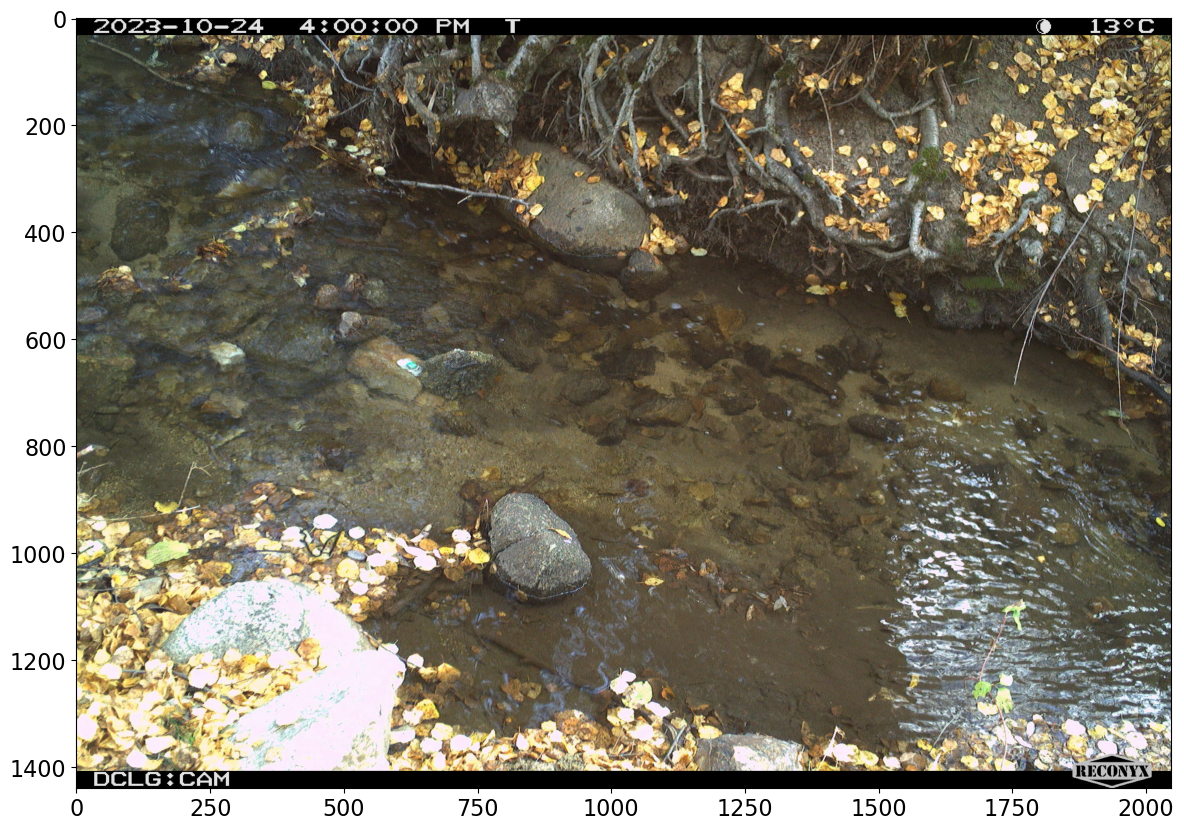

In [4]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(16,10))
plt.imshow(river_pic)
plt.show()

In [5]:
river_pic.shape

(1440, 2048, 3)

### 3. Plot All Bands Independently

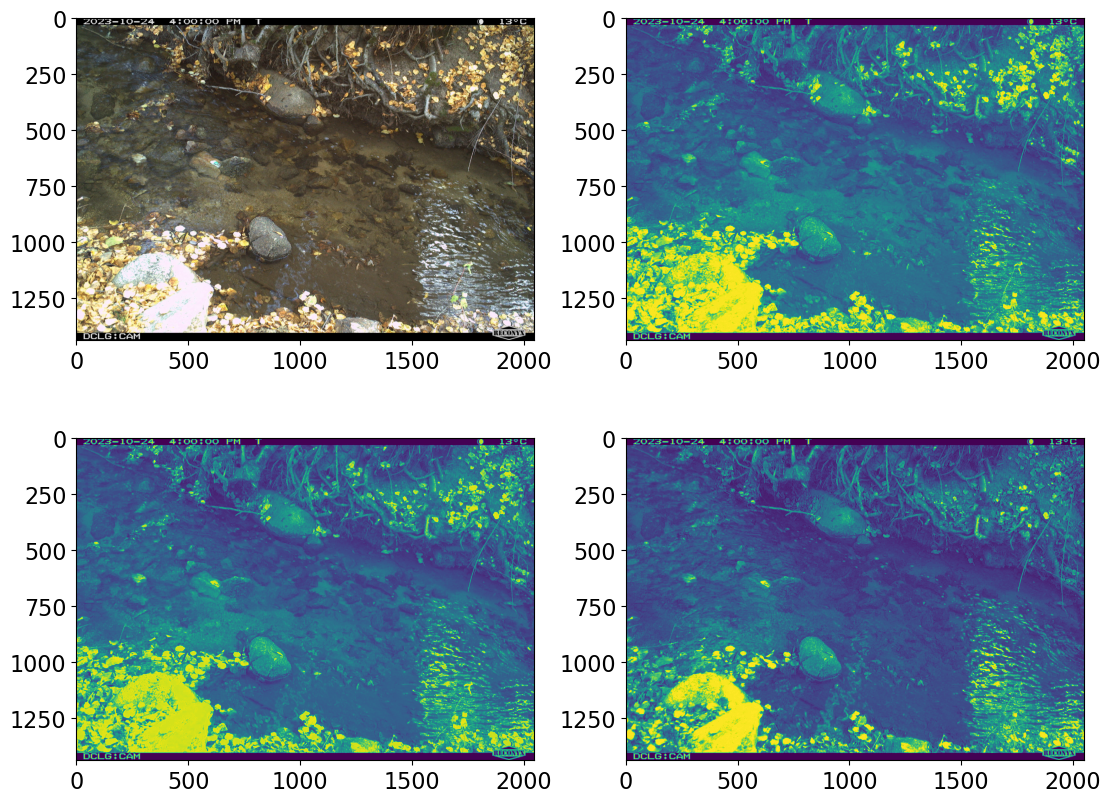

In [6]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.imshow(river_pic)
plt.subplot(2,2,2)
plt.imshow(river_pic[:,:,0])
plt.subplot(2,2,3)
plt.imshow(river_pic[:,:,1])
plt.subplot(2,2,4)
plt.imshow(river_pic[:,:,2])
plt.show()


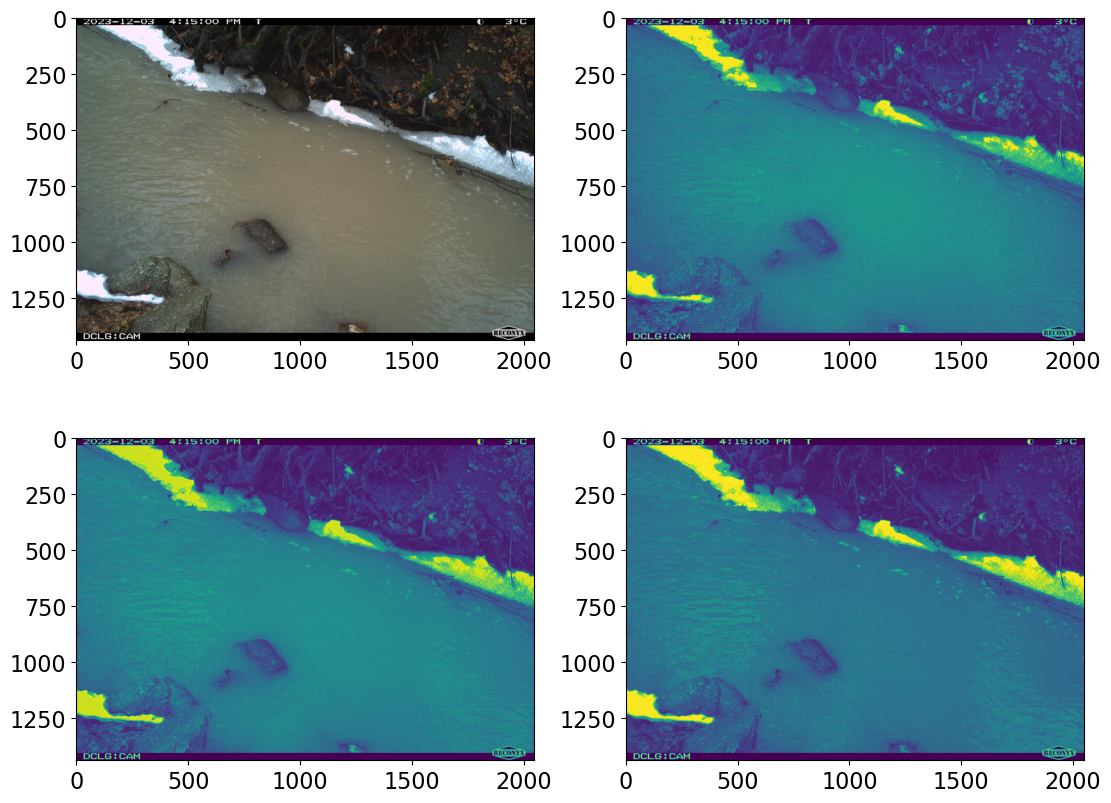

In [6]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.imshow(river_pic_sediment)
plt.subplot(2,2,2)
plt.imshow(river_pic_sediment[:,:,0])
plt.subplot(2,2,3)
plt.imshow(river_pic_sediment[:,:,1])
plt.subplot(2,2,4)
plt.imshow(river_pic_sediment[:,:,2])
plt.show()


### 4. Get a Subset of the Images

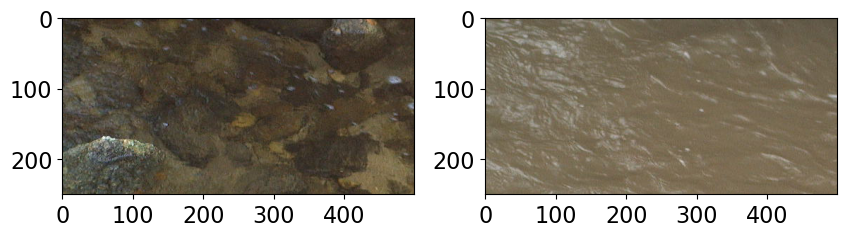

In [12]:
river_pic_ss1 = river_pic[450:700,650:1150,:]
river_pic_sediment_ss1 = river_pic_sediment[450:700,650:1150,:]

plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.imshow(river_pic_ss1)
plt.subplot(1,2,2)
plt.imshow(river_pic_sediment_ss1)


### 5. Do Some Quick Statistical Analyses

Calculate the average in the subset window, and plot the reflectance in the red, green, and blue bands of the spectrum.

In [8]:
ss1_avg = np.mean(river_pic_ss1, axis=(0,1))
ss1_sediment_avg = np.mean(river_pic_sediment_ss1, axis=(0,1))

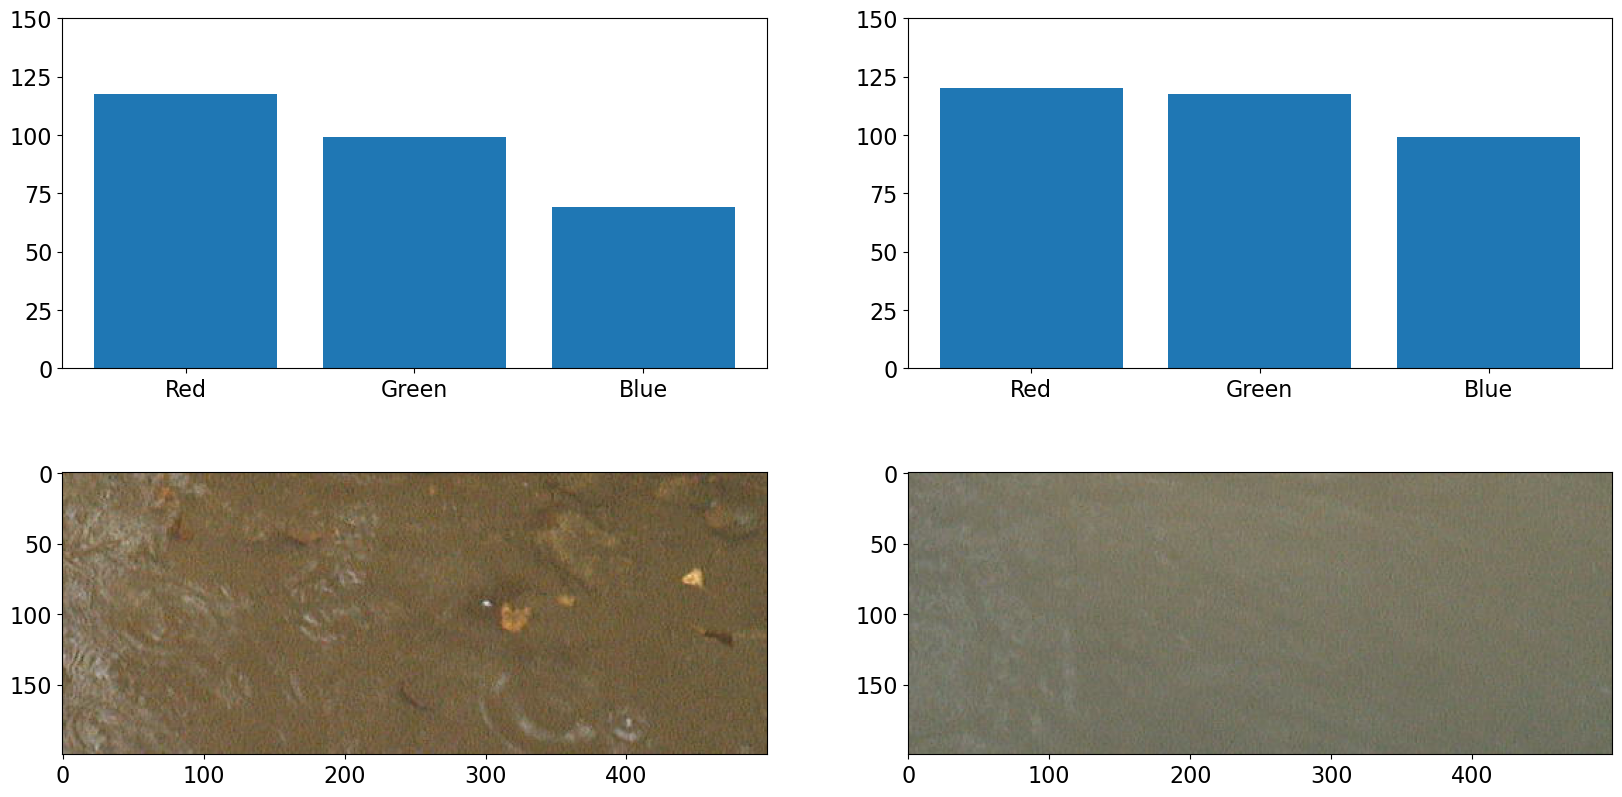

In [9]:
bands = ('Red', 'Green', 'Blue')

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.bar(bands,ss1_avg)
plt.ylim((0,150))
plt.subplot(2,2,2)
plt.bar(bands,ss1_sediment_avg)
plt.ylim((0,150))
plt.subplot(2,2,3)
plt.imshow(river_pic_ss1)
plt.subplot(2,2,4)
plt.imshow(river_pic_sediment_ss1)
plt.show()
